# Loan Prediction  
### Problem: Predict if a loan will get approved or not.

### Import Libraries and Data

In [447]:
#data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('magma')

#model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [448]:
test_set = pd.read_csv('test_lAUu6dG.csv')
train_set = pd.read_csv('train_ctrUa4K.csv')

In [449]:
print(np.shape(train_set))
train_set.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [450]:
print(np.shape(test_set))
test_set.head()


(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Data Cleaning

##### High Level - Familiarize with the Data

In [451]:
#cleaned data set
cleaned_df = train_set.copy()

In [452]:
train_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


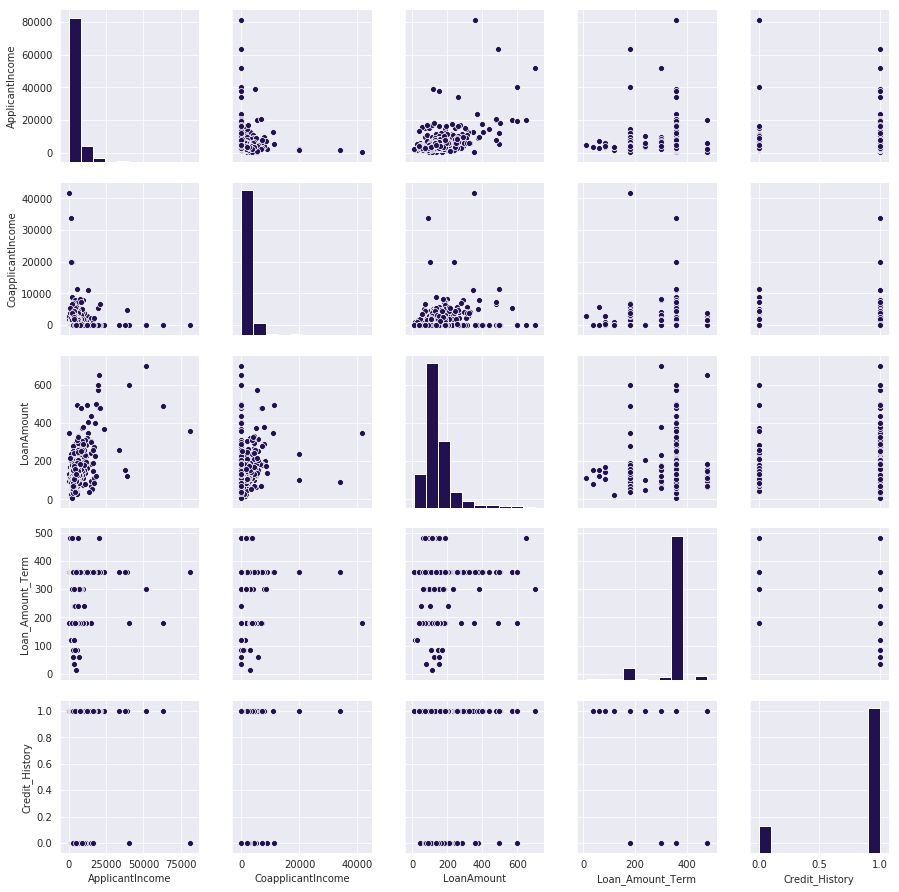

In [453]:
sns.pairplot(train_set)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


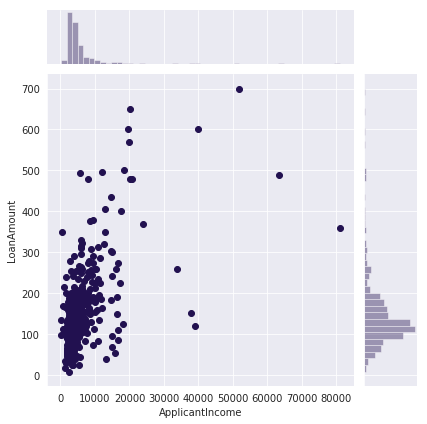

In [454]:
sns.jointplot(train_set['ApplicantIncome'], train_set['LoanAmount'])

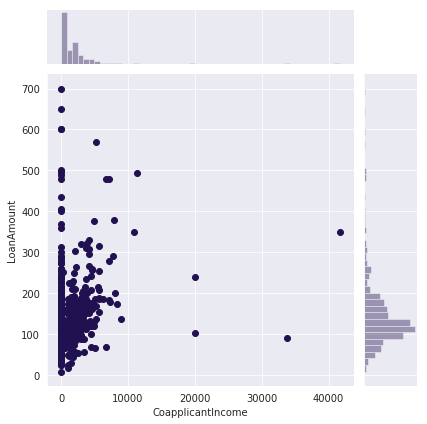

In [455]:
sns.jointplot(train_set['CoapplicantIncome'], train_set['LoanAmount'])

### Impute for Missing Values

#### Find Nulls

In [456]:
nulls_df = cleaned_df[cleaned_df.isnull().any(axis=1)][cleaned_df.columns.tolist()]
np.shape(nulls_df)

(134, 13)

In [457]:
np.shape(train_set)

(614, 13)

In [458]:
np.shape(nulls_df)[0]/np.shape(train_set)[0]

0.2182410423452769

In [459]:
gender_null_df = train_set[train_set['Gender'].isnull()]
np.shape(gender_null_df)

(13, 13)

Given that the subject is Married and is a Graduate, what is the probability the subject is male. 

In [460]:
gender_not_null_df = train_set[train_set['Gender'].isnull() == False]
np.shape(gender_not_null_df)


(601, 13)

##### Impute Gender based on education level and marital status

In [461]:
# Full set, Graduate and Married
married_graduate_df = gender_not_null_df[(gender_not_null_df['Married'] == 'Yes') & (gender_not_null_df['Education'] == 'Graduate')]
print(np.shape(married_graduate_df))

#Full set, Graduate, UnMarried
unmarried_graduate_df = gender_not_null_df[(gender_not_null_df['Married'] == 'No') & (gender_not_null_df['Education'] == 'Graduate')]
print(np.shape(unmarried_graduate_df))

#Full set, UnGraduate, UnMarried
unmarried_ungraduate_df = gender_not_null_df[(gender_not_null_df['Married'] == 'No') & (gender_not_null_df['Education'] != 'Graduate')]
print(np.shape(unmarried_ungraduate_df))

#Full set, UnGraduate, Married
married_ungraduate_df = gender_not_null_df[(gender_not_null_df['Married'] == 'Yes') & (gender_not_null_df['Education'] != 'Graduate')]
print(np.shape(married_ungraduate_df))

(300, 13)
(165, 13)
(45, 13)
(88, 13)


For married, graduate applicants 0.9166666666666666 are male and 0.08333333333333333 are female.


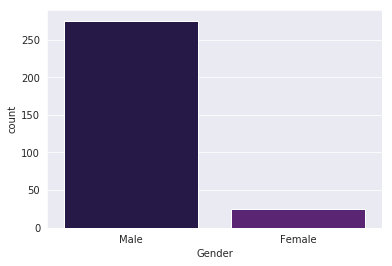

In [462]:
sns.countplot(data=married_graduate_df, x='Gender')
#married_graduate gender ratio
m_g_male = (married_graduate_df[married_graduate_df['Gender'] == 'Male']['Gender'].count())/(married_graduate_df['Gender'].count())
m_g_female = (married_graduate_df[married_graduate_df['Gender'] == 'Female']['Gender'].count())/(married_graduate_df['Gender'].count())
print(f"For married, graduate applicants {m_g_male} are male and {m_g_female} are female.")


For unmarried, graduate applicants 0.6 are male and 0.4 are female.


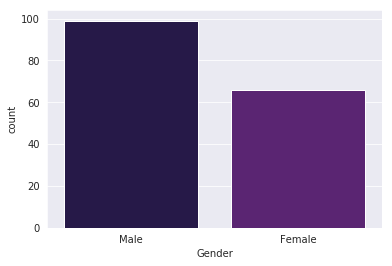

In [463]:
sns.countplot(data=unmarried_graduate_df, x='Gender')
#unmarried_graduate gender ratio
um_g_male = (unmarried_graduate_df[unmarried_graduate_df['Gender'] == 'Male']['Gender'].count())/(unmarried_graduate_df['Gender'].count())
um_g_female = (unmarried_graduate_df[unmarried_graduate_df['Gender'] == 'Female']['Gender'].count())/(unmarried_graduate_df['Gender'].count())
print(f"For unmarried, graduate applicants {um_g_male} are male and {um_g_female} are female.")


For unmarried, not graduate applicants 0.6 are male and 0.4 are female.


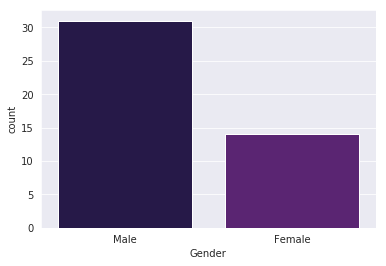

In [464]:
sns.countplot(data=unmarried_ungraduate_df, x='Gender')
#unmarried_ungraduate gender ratio
um_ug_male = (unmarried_graduate_df[unmarried_graduate_df['Gender'] == 'Male']['Gender'].count())/(unmarried_graduate_df['Gender'].count())
um_ug_female = (unmarried_graduate_df[unmarried_graduate_df['Gender'] == 'Female']['Gender'].count())/(unmarried_graduate_df['Gender'].count())
print(f"For unmarried, not graduate applicants {um_ug_male} are male and {um_ug_female} are female.")


In [465]:
def simple_probability(x,y):
    return x / y

In [466]:
#Married Graduate Probability
gender_not_null = np.shape(gender_not_null_df)[0]
male_married_graduate = np.shape(married_graduate_df[married_graduate_df['Gender']=='Male'])[0]
female_married_graduate = np.shape(married_graduate_df[married_graduate_df['Gender']=='Female'])[0]

p_male_married_graduate = round(simple_probability(male_married_graduate, gender_not_null), 3)
p_female_married_graduate = round(simple_probability(female_married_graduate, gender_not_null), 3)

print("Male Married Graduate: ", p_male_married_graduate, "\n","Female Married Graduate: ", p_female_married_graduate)


Male Married Graduate:  0.458 
 Female Married Graduate:  0.042


In [467]:
# Unmarried Graduate Probability
gender_not_null = np.shape(gender_not_null_df)[0]
male_unmarried_graduate = np.shape(unmarried_graduate_df[unmarried_graduate_df['Gender']=='Male'])[0]
female_unmarried_graduate = np.shape(unmarried_graduate_df[unmarried_graduate_df['Gender']=='Female'])[0]

p_male_unmarried_graduate = round(simple_probability(male_unmarried_graduate, gender_not_null), 3)
p_female_unmarried_graduate = round(simple_probability(female_unmarried_graduate, gender_not_null), 3)

print("Male Unmarried Graduate: ", p_male_unmarried_graduate,"\n","Female Unmarried Graduate: ", p_female_unmarried_graduate)

Male Unmarried Graduate:  0.165 
 Female Unmarried Graduate:  0.11


In [468]:
# Married Ungraduate Probability
gender_not_null = np.shape(gender_not_null_df)[0]
male_married_ungraduate = np.shape(married_ungraduate_df[married_ungraduate_df['Gender']=='Male'])[0]
female_married_ungraduate = np.shape(married_ungraduate_df[married_ungraduate_df['Gender']=='Female'])[0]

p_male_married_ungraduate = round(simple_probability(male_married_ungraduate, gender_not_null), 3)
p_female_married_ungraduate = round(simple_probability(female_married_ungraduate, gender_not_null), 3)

print("Male Married Not-Graduated: ", p_male_married_ungraduate,"\n","Female Married Not-Graduated: ", p_female_married_ungraduate)

Male Married Not-Graduated:  0.136 
 Female Married Not-Graduated:  0.01


In [469]:
# Unmarried Ungraduate Probability
gender_not_null = np.shape(gender_not_null_df)[0]
male_unmarried_ungraduate = np.shape(unmarried_ungraduate_df[unmarried_ungraduate_df['Gender']=='Male'])[0]
female_unmarried_ungraduate = np.shape(unmarried_ungraduate_df[unmarried_ungraduate_df['Gender']=='Female'])[0]

p_male_unmarried_ungraduate = round(simple_probability(male_unmarried_ungraduate, gender_not_null), 3)
p_female_unmarried_ungraduate = round(simple_probability(female_unmarried_ungraduate, gender_not_null), 3)

print("Male, Not-Married, Not-Graduated: ", p_male_unmarried_ungraduate,"\n","Female, Not-Married, Not-Graduated: ", p_female_unmarried_ungraduate)

Male, Not-Married, Not-Graduated:  0.052 
 Female, Not-Married, Not-Graduated:  0.023


In [470]:
#Check that individual probabilities add up to sample space
round((p_male_married_graduate + p_male_married_ungraduate + p_male_unmarried_graduate + p_male_unmarried_ungraduate + p_female_married_graduate + p_female_married_ungraduate + p_female_unmarried_graduate + p_female_unmarried_ungraduate),3)

0.996

Impute based on Percentages

In [471]:
p_male = round((p_male_married_graduate + p_male_married_ungraduate + p_male_unmarried_graduate + p_male_unmarried_ungraduate), 3)
p_female = round((p_female_married_graduate + p_female_married_ungraduate + p_female_unmarried_graduate + p_female_unmarried_ungraduate), 3)

print('Number of Records imputed as male by percentages: ', round((np.shape(gender_null_df)[0] * p_male), 0))

Number of Records imputed as male by percentages:  11.0


In [472]:
#before imputation
cleaned_df.iloc[gender_null_df.index.tolist()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [473]:
## get null record IDs to a list
gender_null_index_list = gender_null_df.index.values.tolist()
#update the gender for the first 11 indices
for x in gender_null_index_list[0:11]:
    cleaned_df['Gender'][x] = 'Male'
#update the gender for the remaining indices
for x in gender_null_index_list[11:]:
    cleaned_df['Gender'][x] = 'Female'



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [474]:
#after imputation
cleaned_df.iloc[gender_null_index_list]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,Male,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,Male,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,Male,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,Male,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,Male,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,Male,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,Male,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [475]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


##### Impute Married nulls using Gender

In [476]:
#remaining set of records with null values
nulls_df = cleaned_df[cleaned_df.isnull().any(axis=1)][cleaned_df.columns.tolist()]
np.shape(nulls_df)

(122, 13)

In [477]:
#find nulls
df_1 = cleaned_df.copy()
married_nulls_df = df_1[df_1['Married'].isnull()]
married_not_nulls_df = df_1[df_1['Married'].isnull() == False]
married_nulls_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


Impute using the mode because there are only three records out of the entire set

In [478]:
#before male imputation
print(cleaned_df[cleaned_df['Gender']=='Male']['Married'].mode())
cleaned_df[(cleaned_df['Gender']=='Male') & (cleaned_df['Married'].isnull())]

0    Yes
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y


In [479]:
#before female imputation
print(cleaned_df[cleaned_df['Gender']=='Female']['Married'].mode())
cleaned_df[(cleaned_df['Gender']=='Female') & (cleaned_df['Married'].isnull())]

0    No
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [480]:
#male NaN replacement
a = cleaned_df[(cleaned_df['Gender']=='Male') & (cleaned_df['Married'].isnull())]['Married'].index.tolist()
b = cleaned_df[cleaned_df['Gender']=='Male']['Married'].mode().tolist()[0]
cleaned_df.loc[a, 'Married'] = b

In [481]:
#female NaN replacement
a = cleaned_df[(cleaned_df['Gender']=='Female') & (cleaned_df['Married'].isnull())]['Married'].index.tolist() 
b = cleaned_df[cleaned_df['Gender']=='Female']['Married'].mode().tolist()[0]
cleaned_df.loc[a, 'Married'] = b

In [482]:
cleaned_df.iloc[104]

Loan_ID              LP001357
Gender                   Male
Married                   Yes
Dependents                NaN
Education            Graduate
Self_Employed              No
ApplicantIncome          3816
CoapplicantIncome         754
LoanAmount                160
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status                 Y
Name: 104, dtype: object

In [483]:
cleaned_df.iloc[228]

Loan_ID               LP001760
Gender                    Male
Married                    Yes
Dependents                 NaN
Education             Graduate
Self_Employed               No
ApplicantIncome           4758
CoapplicantIncome            0
LoanAmount                 158
Loan_Amount_Term           480
Credit_History               1
Property_Area        Semiurban
Loan_Status                  Y
Name: 228, dtype: object

In [484]:
cleaned_df.iloc[435]

Loan_ID               LP002393
Gender                  Female
Married                     No
Dependents                 NaN
Education             Graduate
Self_Employed               No
ApplicantIncome          10047
CoapplicantIncome            0
LoanAmount                 NaN
Loan_Amount_Term           240
Credit_History               1
Property_Area        Semiurban
Loan_Status                  Y
Name: 435, dtype: object

In [485]:
nulls_df = cleaned_df[cleaned_df.isnull().any(axis=1)][cleaned_df.columns.tolist()]
np.shape(nulls_df)

(122, 13)

In [486]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Married Nulls are imputed.  
  
##### Impute Dependents

In [487]:
dependents_null_df = cleaned_df[cleaned_df['Dependents'].isnull()].copy()
np.shape(dependents_null_df)

(15, 13)

In [488]:
dependents_null_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [489]:
dependents_not_null_df = cleaned_df[cleaned_df['Dependents'].isnull() == False].copy()
dependents_not_null_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

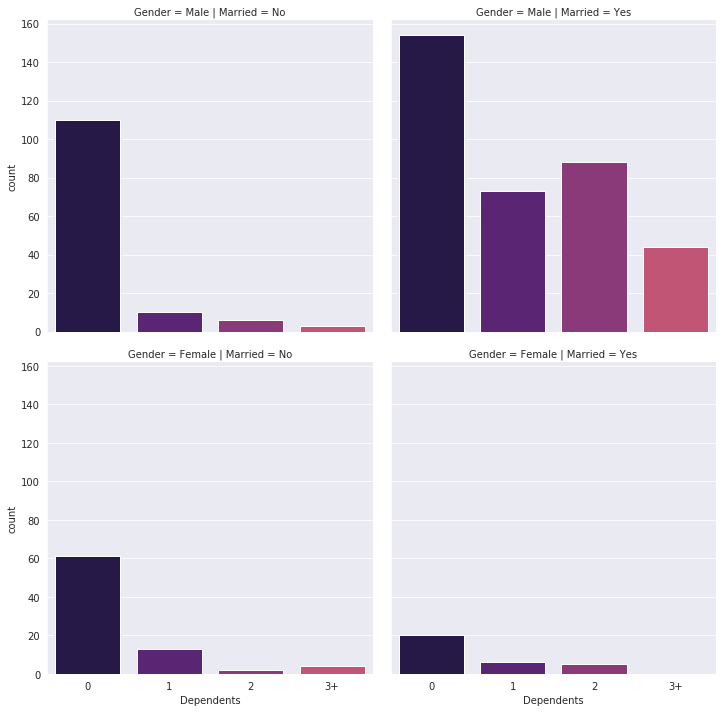

In [490]:
sns.catplot(data=dependents_not_null_df, x='Dependents', row='Gender', col='Married', kind='count')

In [491]:
#find imputation percentages based on Gender and Marital Status
male_married_3plus = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Male') & (dependents_not_null_df['Married']=='Yes') & (dependents_not_null_df['Dependents']=='3+')])[0])/(np.shape(dependents_not_null_df)[0])
male_unmarried_3plus = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Male') & (dependents_not_null_df['Married']=='No') & (dependents_not_null_df['Dependents']=='3+')])[0])/(np.shape(dependents_not_null_df)[0])
female_married_3plus = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Female') & (dependents_not_null_df['Married']=='Yes') & (dependents_not_null_df['Dependents']=='3+')])[0])/(np.shape(dependents_not_null_df)[0])
female_unmarried_3plus = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Female') & (dependents_not_null_df['Married']=='No') & (dependents_not_null_df['Dependents']=='3+')])[0])/(np.shape(dependents_not_null_df)[0])
male_married_2 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Male') & (dependents_not_null_df['Married']=='Yes') & (dependents_not_null_df['Dependents']=='2')])[0])/(np.shape(dependents_not_null_df)[0])
male_unmarried_2 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Male') & (dependents_not_null_df['Married']=='No') & (dependents_not_null_df['Dependents']=='2')])[0])/(np.shape(dependents_not_null_df)[0])
female_married_2 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Female') & (dependents_not_null_df['Married']=='Yes') & (dependents_not_null_df['Dependents']=='2')])[0])/(np.shape(dependents_not_null_df)[0])
female_unmarried_2 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Female') & (dependents_not_null_df['Married']=='No') & (dependents_not_null_df['Dependents']=='2')])[0])/(np.shape(dependents_not_null_df)[0])
male_married_1 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Male') & (dependents_not_null_df['Married']=='Yes') & (dependents_not_null_df['Dependents']=='1')])[0])/(np.shape(dependents_not_null_df)[0])
male_unmarried_1 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Male') & (dependents_not_null_df['Married']=='No') & (dependents_not_null_df['Dependents']=='1')])[0])/(np.shape(dependents_not_null_df)[0])
female_married_1 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Female') & (dependents_not_null_df['Married']=='Yes') & (dependents_not_null_df['Dependents']=='1')])[0])/(np.shape(dependents_not_null_df)[0])
female_unmarried_1 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Female') & (dependents_not_null_df['Married']=='No') & (dependents_not_null_df['Dependents']=='1')])[0])/(np.shape(dependents_not_null_df)[0])
male_married_0 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Male') & (dependents_not_null_df['Married']=='Yes') & (dependents_not_null_df['Dependents']=='0')])[0])/(np.shape(dependents_not_null_df)[0])
male_unmarried_0 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Male') & (dependents_not_null_df['Married']=='No') & (dependents_not_null_df['Dependents']=='0')])[0])/(np.shape(dependents_not_null_df)[0])
female_married_0 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Female') & (dependents_not_null_df['Married']=='Yes') & (dependents_not_null_df['Dependents']=='0')])[0])/(np.shape(dependents_not_null_df)[0])
female_unmarried_0 = (np.shape(dependents_not_null_df[(dependents_not_null_df['Gender']=='Female') & (dependents_not_null_df['Married']=='No') & (dependents_not_null_df['Dependents']=='0')])[0])/(np.shape(dependents_not_null_df)[0])

In [492]:
#check full not null sample space
male_married_3plus + male_unmarried_3plus + female_married_3plus + female_unmarried_3plus + male_married_2 + male_unmarried_2 + female_married_2 + female_unmarried_2 + male_married_1 + male_unmarried_1 + female_married_1 + female_unmarried_1 + male_married_0 + male_unmarried_0 + female_married_0 + female_unmarried_0

1.0

In [493]:
#How many male and married null records are there?
np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='Yes')])

(10, 13)

In [494]:
#male married by dependents percentages
print("Male, Married, 3plus: ", round(male_married_3plus * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='Yes')])[0], 1))
print("Male, Married, 2: ",round(male_married_2 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='Yes')])[0], 1))
print("Male, Married, 1: ",round(male_married_1 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='Yes')])[0], 1))
print("Male, Married, 0: ",round(male_married_0 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='Yes')])[0], 1))

Male, Married, 3plus:  0.7
Male, Married, 2:  1.5
Male, Married, 1:  1.2
Male, Married, 0:  2.6


In [495]:
#before imputation
dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='Yes')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
571,LP002847,Male,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N


In [496]:
#impute dependent values
a = dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='Yes')].index.tolist()
cleaned_df.loc[a[0:5], 'Dependents'] =  '0'
cleaned_df.loc[a[5:7], 'Dependents'] = '1'
cleaned_df.loc[a[7:9], 'Dependents'] = '2'
cleaned_df.loc[a[9], 'Dependents'] = '3+'

In [497]:
#after imputation
cleaned_df.loc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,0,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,0,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
301,LP001972,Male,Yes,1,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
335,LP002106,Male,Yes,1,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,2,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
517,LP002682,Male,Yes,2,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
571,LP002847,Male,Yes,3+,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N


In [498]:
#remaining dependents null records
dependents_null_df = cleaned_df[cleaned_df['Dependents'].isnull()].copy()
#np.shape(dependents_null_df)
dependents_null_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
435,LP002393,Female,No,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [499]:
#male unmarried by dependents percentages
print("Male, Not Married, 3plus: ",round(male_unmarried_3plus * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='No')])[0], 1))
print("Male, Not Married, 2: ",round(male_unmarried_2 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='No')])[0], 1))
print("Male, Not Married, 1: ",round(male_unmarried_1 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='No')])[0], 1))
print("Male, Not Married, 0: ",round(male_unmarried_0 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='No')])[0], 1))

Male, Not Married, 3plus:  0.0
Male, Not Married, 2:  0.0
Male, Not Married, 1:  0.0
Male, Not Married, 0:  0.4


In [500]:
#before imputation
a = dependents_null_df[(dependents_null_df['Gender']=='Male') & (dependents_null_df['Married']=='No')].index.tolist()
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [501]:
cleaned_df.loc[a, 'Dependents'] =  '0'

In [502]:
#after imputation
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
332,LP002100,Male,No,0,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
597,LP002943,Male,No,0,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [503]:
#remaining dependents null records
dependents_null_df = cleaned_df[cleaned_df['Dependents'].isnull()].copy()
#np.shape(dependents_null_df)
dependents_null_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
435,LP002393,Female,No,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [504]:
#female unmarried by dependents percentages
print("Female, Not Married, 3plus: ",round(female_unmarried_3plus * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Female') & (dependents_null_df['Married']=='No')])[0], 1))
print("Female, Not Married, 2: ",round(female_unmarried_2 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Female') & (dependents_null_df['Married']=='No')])[0], 1))
print("Female, Not Married, 1: ",round(female_unmarried_1 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Female') & (dependents_null_df['Married']=='No')])[0], 1))
print("Female, Not Married, 0: ",round(female_unmarried_0 * np.shape(dependents_null_df[(dependents_null_df['Gender']=='Female') & (dependents_null_df['Married']=='No')])[0], 1))

Female, Not Married, 3plus:  0.0
Female, Not Married, 2:  0.0
Female, Not Married, 1:  0.1
Female, Not Married, 0:  0.3


In [505]:
#before imputation
a = dependents_null_df[(dependents_null_df['Gender']=='Female') & (dependents_null_df['Married']=='No')].index.tolist()
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
435,LP002393,Female,No,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [506]:
cleaned_df.loc[a[0:2], 'Dependents'] =  '0'
cleaned_df.loc[a[2], 'Dependents'] =  '1'

In [507]:
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
293,LP001945,Female,No,0,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
355,LP002144,Female,No,0,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
435,LP002393,Female,No,1,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [508]:
#remaining dependents null records
dependents_null_df = cleaned_df[cleaned_df['Dependents'].isnull()].copy()
#np.shape(dependents_null_df)
dependents_null_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Dependents values imputed. 

##### Impute Self_Employed

In [509]:
nulls_df = cleaned_df[cleaned_df.isnull().any(axis=1)][cleaned_df.columns.tolist()]
np.shape(nulls_df)

(110, 13)

In [510]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [511]:
#self employed null records
self_em_nulls_df = cleaned_df[cleaned_df['Self_Employed'].isnull()].copy()
np.shape(self_em_nulls_df)

(32, 13)

In [512]:
#self employed not null records
self_em_not_null_df = cleaned_df[cleaned_df['Self_Employed'].isnull()==False].copy()
np.shape(self_em_not_null_df)

(582, 13)

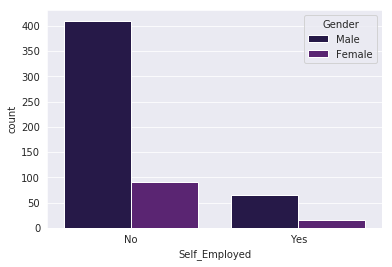

In [513]:
sns.countplot(data=self_em_not_null_df, x='Self_Employed', hue='Gender')

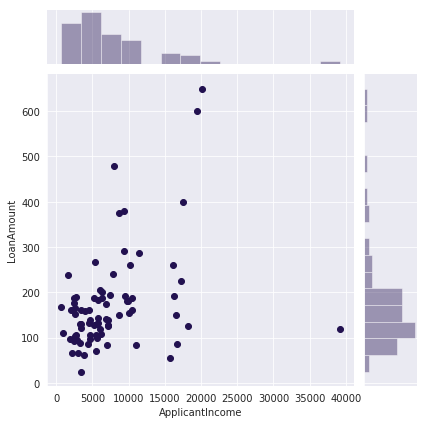

In [514]:
sns.jointplot(data=self_em_not_null_df[self_em_not_null_df['Self_Employed']=='Yes'], x='ApplicantIncome', y='LoanAmount')

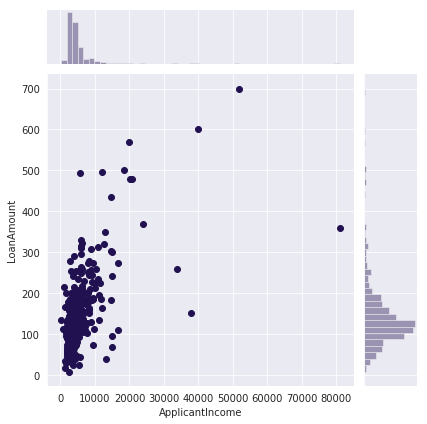

In [515]:
sns.jointplot(data=self_em_not_null_df[self_em_not_null_df['Self_Employed']=='No'], x='ApplicantIncome', y='LoanAmount')

In [516]:
#self employment general percentage
self_employed = (np.shape(self_em_not_null_df[self_em_not_null_df['Self_Employed']=='Yes'])[0])/(np.shape(self_em_not_null_df)[0])
not_self_employed = (np.shape(self_em_not_null_df[self_em_not_null_df['Self_Employed']=='No'])[0])/(np.shape(self_em_not_null_df)[0])

In [517]:
#how are the records split by percentage?
print("Not Self Employed: ", round(not_self_employed * (np.shape(self_em_nulls_df)[0]))) 
print("Self Employed: ", round(self_employed * (np.shape(self_em_nulls_df)[0])))

Not Self Employed:  27
Self Employed:  5


In [518]:
#before imputation
a = self_em_nulls_df.index.tolist()
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [519]:
cleaned_df.loc[a[0:5], 'Self_Employed'] = 'Yes'
cleaned_df.loc[a[5:], 'Self_Employed'] = 'No'

In [520]:
#after imputation
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,Yes,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,Yes,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,Yes,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,Yes,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,Yes,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,No,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,No,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,No,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,No,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [521]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Self_Employed values imputed.

##### Impute LoanAmount

In [522]:
loanAmount_nulls_df = cleaned_df[cleaned_df['LoanAmount'].isnull()]
np.shape(loanAmount_nulls_df)

(22, 13)

In [523]:
loanAmount_nulls_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [524]:
loanAmount_not_nulls_df = cleaned_df[cleaned_df['LoanAmount'].isnull()==False]
np.shape(loanAmount_not_nulls_df)

(592, 13)

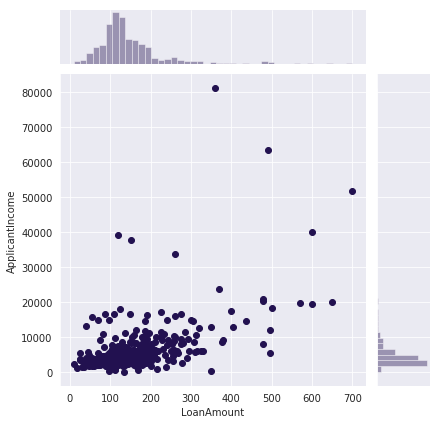

In [525]:
sns.jointplot(data=loanAmount_not_nulls_df, x= 'LoanAmount', y='ApplicantIncome')

In [526]:
loanAmount_descriptive_df = loanAmount_not_nulls_df.describe()
loanAmount_descriptive_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,592.000000,592.000000,592.000000,578.000000,543.000000
mean,5404.304054,1642.633311,146.412162,342.145329,0.843462
std,6164.073003,2967.717486,85.587325,65.442101,0.363699
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2887.250000,0.000000,100.000000,360.000000,1.000000
50%,3806.000000,1221.000000,128.000000,360.000000,1.000000
75%,5754.500000,2312.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [527]:
#impute using mean
loanAmount_mean = loanAmount_descriptive_df['LoanAmount']['mean']
a = loanAmount_nulls_df.index.tolist()
cleaned_df.loc[a, 'LoanAmount'] = loanAmount_mean
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,146.412162,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,146.412162,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,146.412162,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,146.412162,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,146.412162,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,146.412162,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,146.412162,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,146.412162,180.0,1.0,Urban,N


In [528]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


LoanAmount values imputed.  

##### Impute Loan_Amount_Term

In [529]:
nulls_df = cleaned_df[cleaned_df.isnull().any(axis=1)][cleaned_df.columns.tolist()]
np.shape(nulls_df)

(64, 13)

In [530]:
LAT_not_nulls_df = cleaned_df[cleaned_df['Loan_Amount_Term'].isnull()==False]
np.shape(LAT_not_nulls_df)

(600, 13)

In [531]:
LAT_nulls_df = cleaned_df[cleaned_df['Loan_Amount_Term'].isnull()]
np.shape(LAT_nulls_df)

(14, 13)

In [532]:
LAT_nulls_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,Yes,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


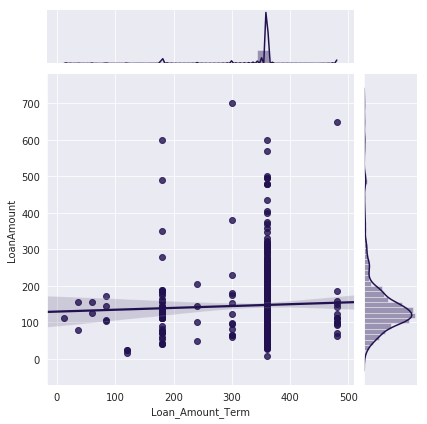

In [533]:
sns.jointplot(data=LAT_not_nulls_df, x='Loan_Amount_Term', y='LoanAmount', kind='reg')

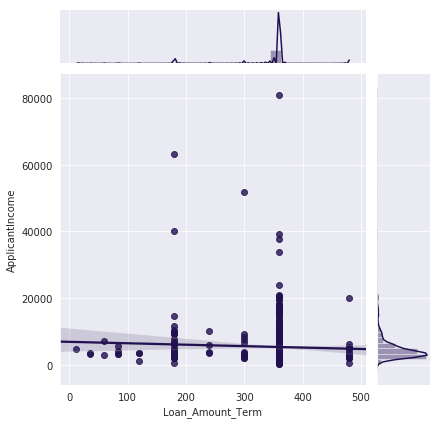

In [534]:
sns.jointplot(data=LAT_not_nulls_df, x='Loan_Amount_Term', y='ApplicantIncome', kind='reg')

In [535]:
LAT_not_nulls_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [536]:
#impute the values using the mode loan term amount
a = LAT_nulls_df.index.tolist()
LAT_mode = float(LAT_not_nulls_df['Loan_Amount_Term'].mode())
cleaned_df.loc[a, 'Loan_Amount_Term'] = LAT_mode


In [537]:
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,Yes,2600,3500.0,115.0,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,360.0,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,360.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,360.0,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,360.0,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,360.0,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,360.0,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,360.0,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,360.0,1.0,Rural,Y


In [538]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Loan_Amount_Term nulls imputed.  

##### Credit History Imputation

In [539]:
nulls_df = cleaned_df[cleaned_df.isnull().any(axis=1)][cleaned_df.columns.tolist()]
np.shape(nulls_df)

(50, 13)

In [540]:
CH_nulls_df = cleaned_df[cleaned_df['Credit_History'].isnull()]
CH_nulls_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,Yes,3717,2925.0,151.000000,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,Yes,4166,3369.0,201.000000,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.000000,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.000000,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.000000,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.000000,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.000000,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.000000,360.0,NaN,Rural,Y


In [541]:
CH_not_nulls_df = cleaned_df[cleaned_df['Credit_History'].isnull()==False]
CH_not_nulls_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,5466.436170,1530.448440,145.137687,342.595745,0.842199
std,6271.344106,2471.721359,81.741320,63.838715,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,101.750000,360.000000,1.000000
50%,3815.000000,1105.500000,128.500000,360.000000,1.000000
75%,5803.750000,2250.000000,162.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [542]:
CH_not_nulls_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [543]:
#find percentages
CH_1 = (np.shape(CH_not_nulls_df[CH_not_nulls_df['Credit_History']==1])[0])/(np.shape(CH_not_nulls_df)[0])
CH_0 = (np.shape(CH_not_nulls_df[CH_not_nulls_df['Credit_History']==0])[0])/(np.shape(CH_not_nulls_df)[0])
print("With Credit History: ",CH_1,"\n", "Without Credit History: ", CH_0)

With Credit History:  0.8421985815602837 
 Without Credit History:  0.15780141843971632


In [544]:
#find null proportion based on percentages for CH_1
print("CH_1 records: ", round(np.shape(CH_nulls_df)[0] * CH_1, 0))
#find null proportion based on percentages for CH_0
print("CH_1 records: ",round(np.shape(CH_nulls_df)[0] * CH_0, 0))

CH_1 records:  42.0
CH_1 records:  8.0


In [545]:
#impute values
a = CH_nulls_df.index.tolist()
cleaned_df.loc[a[0:42], 'Credit_History'] = 1
cleaned_df.loc[a[42:], 'Credit_History'] = 0
cleaned_df.iloc[a]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,Yes,3717,2925.0,151.000000,360.0,1.0,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,Yes,4166,3369.0,201.000000,360.0,1.0,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.000000,360.0,1.0,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.000000,360.0,1.0,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.000000,360.0,1.0,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.000000,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,1.0,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.000000,360.0,1.0,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.000000,360.0,1.0,Rural,Y


Credit History nulls imputed.  


In [546]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


All null values imputed. 

#### Outliers  
##### Identify Outliers

In [547]:
df_1 = cleaned_df.copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [548]:
def outliers_rating(dataframe, column):
    #needed variables
    Q1 = dataframe[f"{column}"].describe()['25%']
    Q3 = dataframe[f"{column}"].describe()['75%']
    
    #calculated variables
    IQR = Q3 - Q1
    Q1_fence = Q1 - (IQR * 1.5)
    Q3_fence = Q3 + (IQR * 1.5)
    
    '''
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'Q1_fence: {Q1_fence}')
    print(f'Q3_fence: {Q3_fence}')
    '''
    #calculate outler rating
    
    #we know this works, buts its slow
    for x in range(len(dataframe[f"{column}"])-1):
        if( (dataframe[f"{column}"][x] >= Q3_fence) | (dataframe[f"{column}"][x] <= Q1_fence)):
            dataframe.loc[x, 'Outlier_Rating'] += 1
        else:
            pass
    '''
    #would like to optimize using a lambda and .apply()
    dataframe['Outlier_Rating'] = dataframe['Outlier_Rating'].apply(lambda x: x+1 if( (dataframe[f"{column}"][x] >= Q3_fence)) else (x) )
    
    print(dataframe[dataframe['Outlier_Rating'] > 0])
    '''        
    
    #return dataframe of outliers for that column
    return dataframe

    
    


In [549]:
#create Outlier rating column
df_1['Outlier_Rating'] = 0
df_1.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Outlier_Rating
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0


In [550]:
#find outlier count
df_outliers = outliers_rating(df_1, 'ApplicantIncome')
df_outliers = outliers_rating(df_1, 'CoapplicantIncome')
df_outliers = outliers_rating(df_1, 'LoanAmount')
df_outliers = outliers_rating(df_1, 'Loan_Amount_Term')

In [551]:
df_outliers.sort_values(by='Outlier_Rating', ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Outlier_Rating
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,4
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,0.0,Urban,Y,4
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N,3
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,3
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y,3
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,3
258,LP001859,Male,Yes,0,Graduate,No,14683,2100.0,304.0,360.0,1.0,Rural,N,3
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,3
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N,3
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y,3


In [552]:
#remove outliers with a rating > 1
a = df_outliers[df_outliers['Outlier_Rating']>1].index.tolist()
cleaned_df.drop(labels=a, inplace=True)

Data is cleaned and ready for Estimator. 

In [553]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              535 non-null object
Gender               535 non-null object
Married              535 non-null object
Dependents           535 non-null object
Education            535 non-null object
Self_Employed        535 non-null object
ApplicantIncome      535 non-null int64
CoapplicantIncome    535 non-null float64
LoanAmount           535 non-null float64
Loan_Amount_Term     535 non-null float64
Credit_History       535 non-null float64
Property_Area        535 non-null object
Loan_Status          535 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 58.5+ KB


In [554]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Exploratory Data Analysis

In [555]:
cleaned_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,535.000000,535.000000,535.000000,535.000000,535.000000
mean,4053.818692,1322.784897,127.045314,342.616822,0.844860
std,1853.376675,1421.206067,44.618305,65.464295,0.362377
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2752.500000,0.000000,100.000000,360.000000,1.000000
50%,3598.000000,1260.000000,124.000000,360.000000,1.000000
75%,4891.000000,2194.000000,151.500000,360.000000,1.000000
max,10139.000000,5701.000000,260.000000,480.000000,1.000000


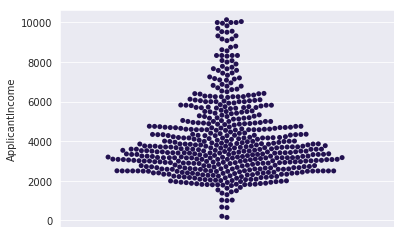

In [556]:
sns.swarmplot(data=cleaned_df, x='ApplicantIncome', orient='v')

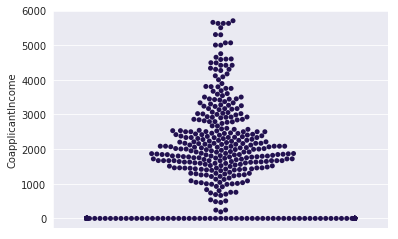

In [557]:
sns.swarmplot(data=cleaned_df, x='CoapplicantIncome', orient='v')

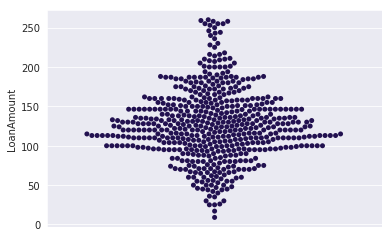

In [558]:
sns.swarmplot(data=cleaned_df, x='LoanAmount', orient='v')

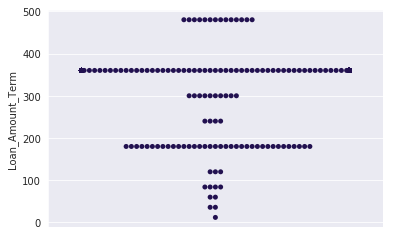

In [559]:
sns.swarmplot(data=cleaned_df, x='Loan_Amount_Term', orient='v')

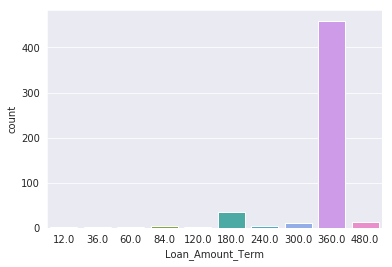

In [560]:
sns.countplot(data=cleaned_df, x="Loan_Amount_Term")

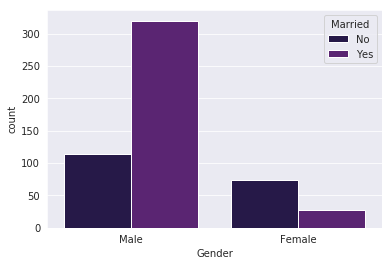

In [561]:
sns.countplot(data=cleaned_df, x="Gender", hue="Married")

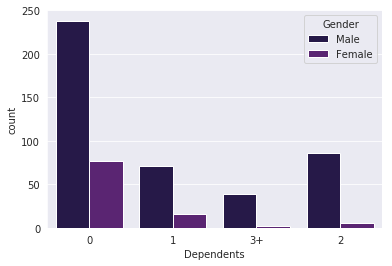

In [562]:
sns.countplot(data=cleaned_df, x="Dependents", hue="Gender")

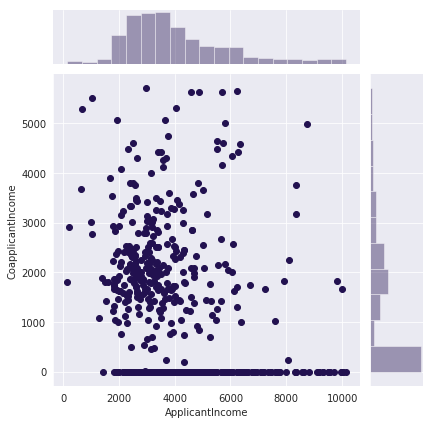

In [563]:
sns.jointplot(data=cleaned_df, x="ApplicantIncome", y="CoapplicantIncome")

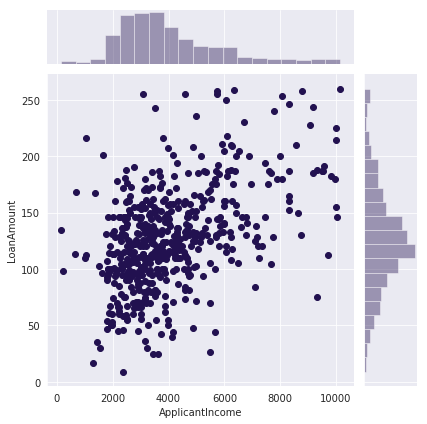

In [564]:
sns.jointplot(data=cleaned_df, x="ApplicantIncome", y="LoanAmount")

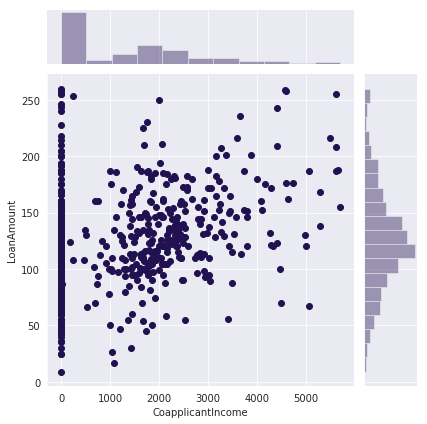

In [565]:
sns.jointplot(data=cleaned_df, x="CoapplicantIncome", y="LoanAmount")

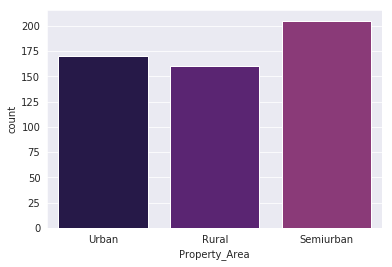

In [566]:
sns.countplot(data=cleaned_df, x='Property_Area')

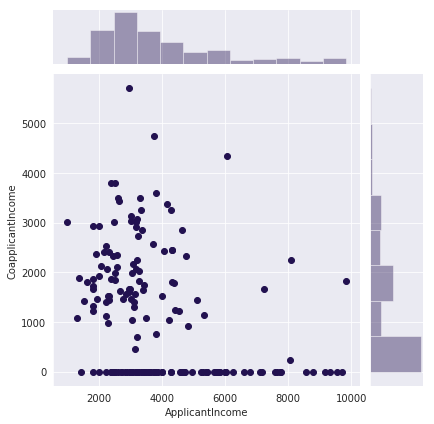

In [567]:
sns.jointplot(data=cleaned_df[cleaned_df['Property_Area']=='Urban'], x="ApplicantIncome", y="CoapplicantIncome")

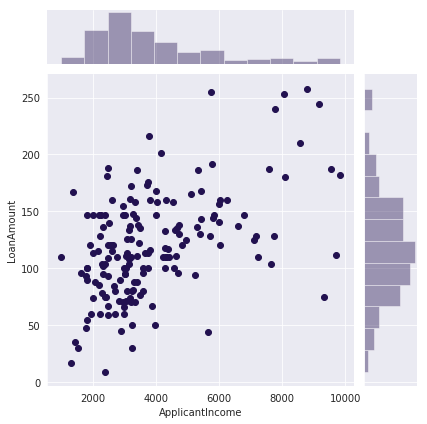

In [568]:
sns.jointplot(data=cleaned_df[cleaned_df['Property_Area']=='Urban'], x="ApplicantIncome", y="LoanAmount")

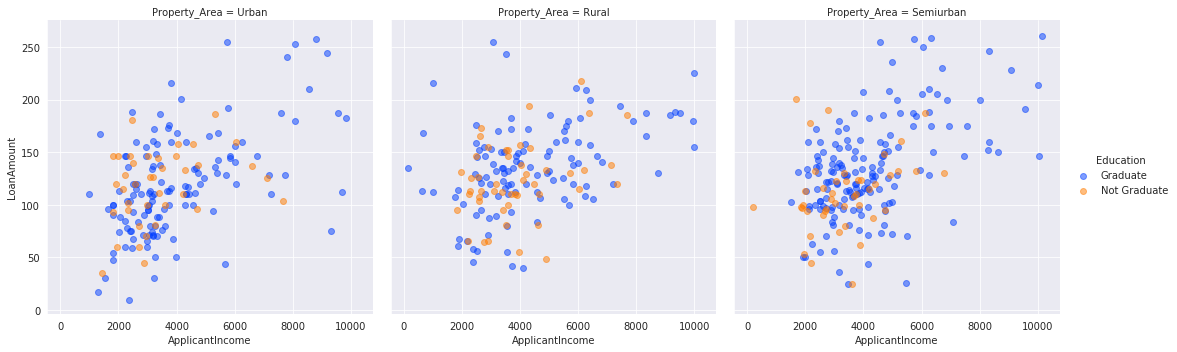

In [569]:
g = sns.FacetGrid(data=cleaned_df, col='Property_Area', hue='Education', height=5, aspect=1, palette='bright')
g.map(plt.scatter, 'ApplicantIncome','LoanAmount', alpha=.5)
g.add_legend();

# Machine Learning

**Algorithm: Logistic Regression**  
There seems to be some linear relationships between many of the continuous variables, so I am choosing the logistic regression estimator for this data set. 

In [570]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              535 non-null object
Gender               535 non-null object
Married              535 non-null object
Dependents           535 non-null object
Education            535 non-null object
Self_Employed        535 non-null object
ApplicantIncome      535 non-null int64
CoapplicantIncome    535 non-null float64
LoanAmount           535 non-null float64
Loan_Amount_Term     535 non-null float64
Credit_History       535 non-null float64
Property_Area        535 non-null object
Loan_Status          535 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 78.5+ KB


In [571]:
cleaned_df.reset_index(inplace=True)
cleaned_df.drop(columns=['index'], axis=1, inplace=True)
cleaned_df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
6,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
7,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
8,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.000000,360.0,1.0,Urban,Y
9,LP001027,Male,Yes,2,Graduate,Yes,2500,1840.0,109.000000,360.0,1.0,Urban,Y


In [597]:
#separate continuous and categorical columns and store in a dataframe
cont_col_df = cleaned_df[cleaned_df.columns.tolist()[6:11]]
cat_col_1_df = cleaned_df[cleaned_df.columns.tolist()[1:6]]
cat_col_2_df = cleaned_df[cleaned_df.columns.tolist()[11]]
cat_col_df = pd.concat([cat_col_1_df, cat_col_2_df], axis=1)
target_df = cleaned_df['Loan_Status']


In [595]:
#create dummy variables in categorical dataframe
cat_dummy_df = pd.get_dummies(data=cat_col_df)
np.shape(cat_dummy_df)

(535, 15)

In [600]:
#standardize continuous in the data frame
from sklearn.preprocessing import StandardScaler
cont_scaled_arr = StandardScaler()
cont_scaled_df = pd.DataFrame(data=cont_scaled_arr.fit_transform(cont_col_df), columns=cont_col_df.columns.tolist())
np.shape(cont_scaled_df)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(535, 5)

In [575]:
#recreate continuous dataframe using the new scaled dataframe and index column
#cont_scaled_df = pd.concat([index_col_df, cont_scaled_df], axis=1)
#np.shape(cont_scaled_df)

In [601]:
#append continuous and categorical postprocessed data
estimator_df = pd.concat([cont_scaled_df, cat_dummy_df, target_df], axis=1)
np.shape(X_train)

(535, 23)

In [602]:
train_df = estimator_df.drop(columns='Loan_Status')
test_df = estimator_df['Loan_Status']


In [603]:
def LogRegression(X, y):
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=101)
    
    #create and fit model
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    
    #predict
    predictions = lg.predict(X_test)
    
    #evaluate predicitons
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

In [604]:
LogRegression(train_df, test_df)

[[ 30  30]
 [  3 114]]
              precision    recall  f1-score   support

           N       0.91      0.50      0.65        60
           Y       0.79      0.97      0.87       117

   micro avg       0.81      0.81      0.81       177
   macro avg       0.85      0.74      0.76       177
weighted avg       0.83      0.81      0.80       177



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
